In [1]:
import sys
from pathlib import Path
# Get the repository root (1 levels up from current notebook)
repo_root = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
sys.path.insert(0, str(repo_root))

# import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Template
# Definición de modulos

import torch
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from imblearn.over_sampling  import SMOTE, ADASYN
from sklearn.ensemble        import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.decomposition import PCA


Template = Template.Template()

# Build the path to the Excel file in the repository root
data_path = os.path.join(os.path.dirname(os.getcwd()), '..', 'Datos1_InteraccionesNIR.xlsx')

In [2]:
# Build the path to the Excel file in the repository root
data_path = os.path.join(repo_root, 'Datos1_InteraccionesNIR.xlsx')
# import the data from all sheets of the Excel file

df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15 = [
    pd.read_excel(data_path, sheet_name=i) for i in range(16)
]


# SMOTE

## Day 1

In [3]:
# Make a new column 'Health_Status'
df = df1.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()



,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.078084,0.075299,0.077410,0.074002,0.070505,0.067700,0.062893,0.062420,...,0.036214,0.036081,0.035957,0.035807,0.035688,0.035551,0.035364,0.035257,0.035179,0.035142
1,Control,1,0.073550,0.067523,0.071681,0.067482,0.063859,0.062469,0.059024,0.057638,...,0.033057,0.032865,0.032683,0.032480,0.032208,0.032009,0.031834,0.031691,0.031569,0.031492
2,Control,1,0.078702,0.072332,0.076551,0.075096,0.069730,0.063826,0.060950,0.061619,...,0.032032,0.031893,0.031702,0.031533,0.031349,0.031142,0.030905,0.030750,0.030586,0.030511
3,Control,1,0.068565,0.067309,0.070531,0.066035,0.062364,0.060529,0.055741,0.052761,...,0.031268,0.031147,0.030997,0.030795,0.030522,0.030354,0.030158,0.030026,0.030024,0.029915
4,Control,1,0.070898,0.067701,0.075494,0.069948,0.063975,0.061855,0.060048,0.059379,...,0.029287,0.029146,0.029101,0.028976,0.028791,0.028641,0.028453,0.028389,0.028404,0.028371


In [4]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    209
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    209
0    209
Name: count, dtype: int64

Original shape: (239, 2151), Balanced shape: (418, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.078084,0.075299,0.077410,0.074002,0.070505,0.067700,0.062893,0.062420,0.063808,...,0.036214,0.036081,0.035957,0.035807,0.035688,0.035551,0.035364,0.035257,0.035179,0.035142
1,1,0.073550,0.067523,0.071681,0.067482,0.063859,0.062469,0.059024,0.057638,0.058499,...,0.033057,0.032865,0.032683,0.032480,0.032208,0.032009,0.031834,0.031691,0.031569,0.031492
2,1,0.078702,0.072332,0.076551,0.075096,0.069730,0.063826,0.060950,0.061619,0.062749,...,0.032032,0.031893,0.031702,0.031533,0.031349,0.031142,0.030905,0.030750,0.030586,0.030511
3,1,0.068565,0.067309,0.070531,0.066035,0.062364,0.060529,0.055741,0.052761,0.053525,...,0.031268,0.031147,0.030997,0.030795,0.030522,0.030354,0.030158,0.030026,0.030024,0.029915
4,1,0.070898,0.067701,0.075494,0.069948,0.063975,0.061855,0.060048,0.059379,0.059372,...,0.029287,0.029146,0.029101,0.028976,0.028791,0.028641,0.028453,0.028389,0.028404,0.028371


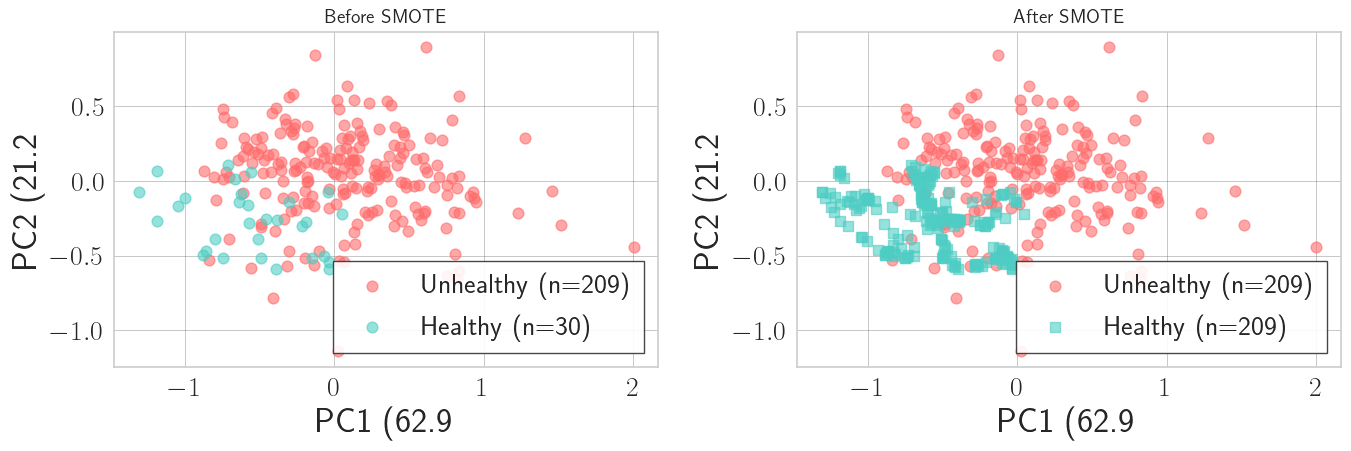

In [5]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

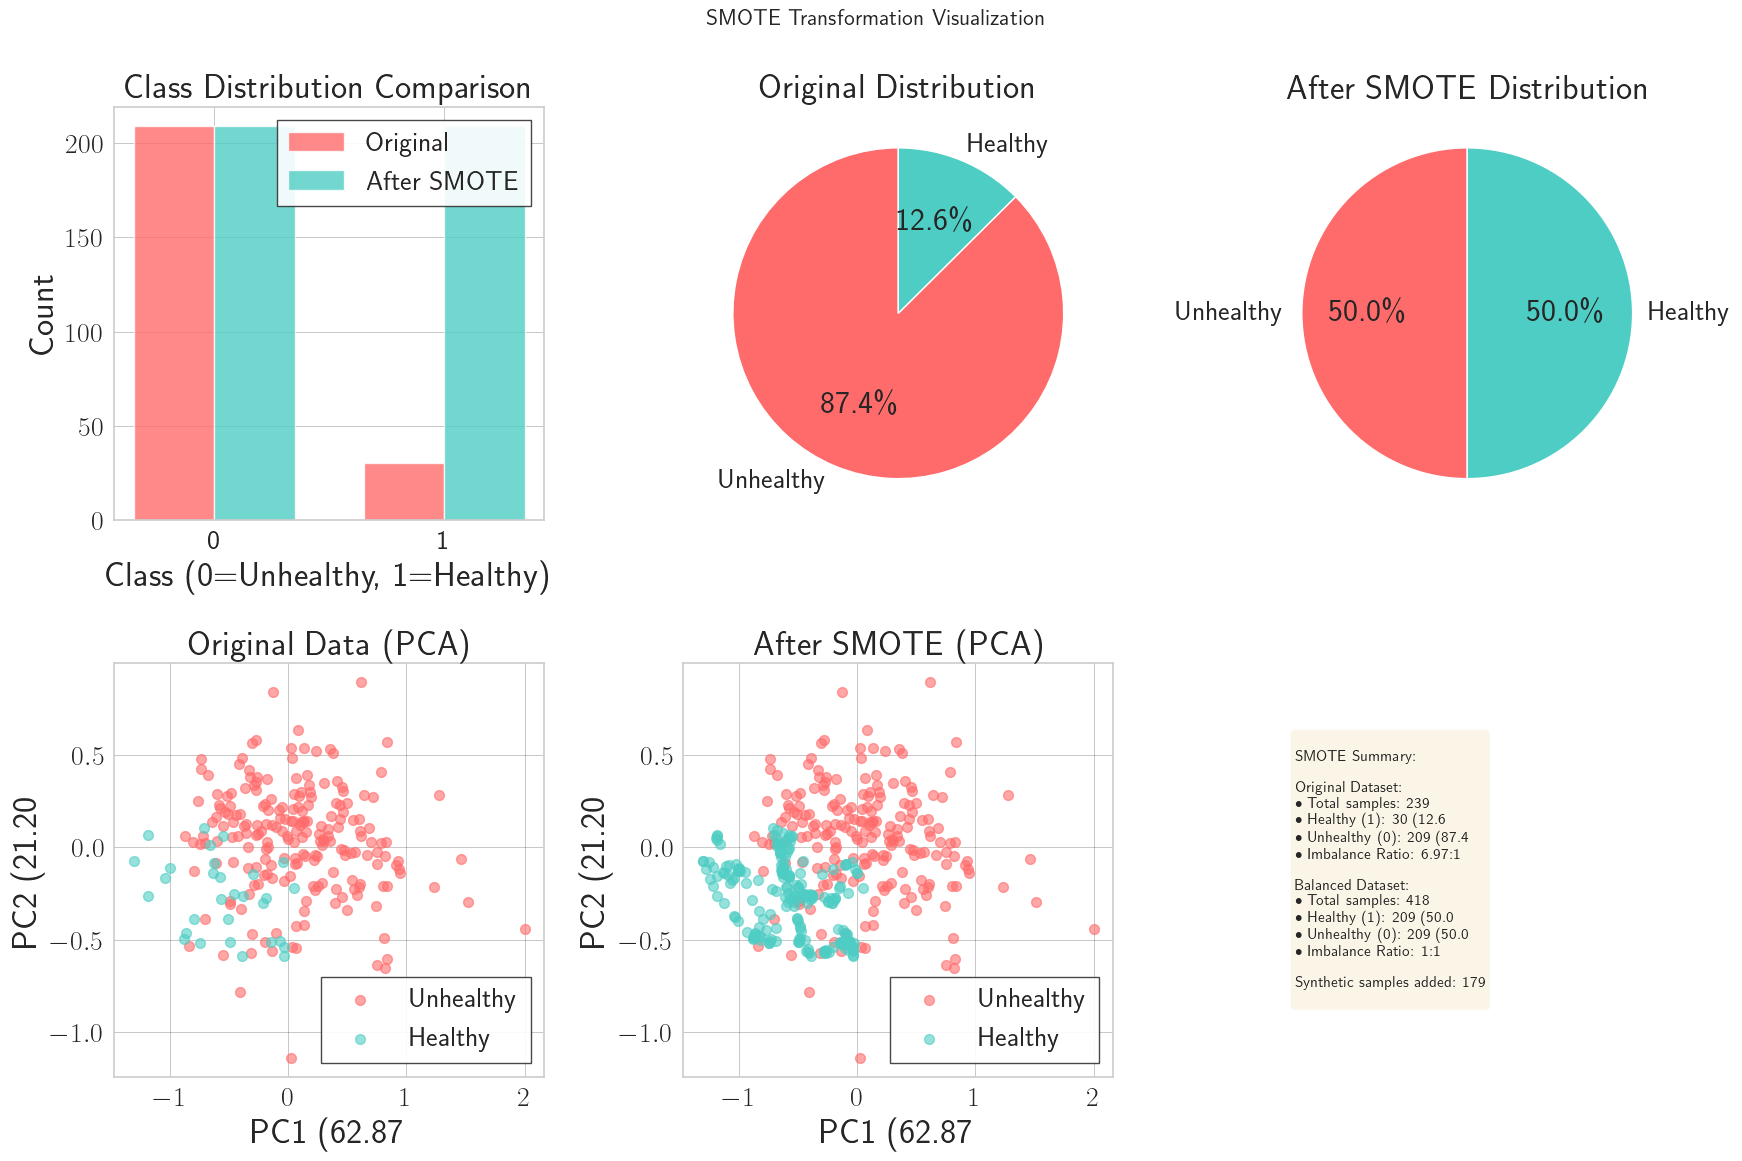

In [6]:
# Visualize SMOTE transformation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SMOTE Transformation Visualization', fontsize=16, fontweight='bold')

# 1. Class distribution comparison (bar plot)
ax1 = axes[0, 0]
original_counts = y.value_counts()
balanced_counts = pd.Series(y_balanced).value_counts()
x = np.arange(2)
width = 0.35
ax1.bar(x - width/2, original_counts.values, width, label='Original', alpha=0.8, color='#FF6B6B')
ax1.bar(x + width/2, balanced_counts.values, width, label='After SMOTE', alpha=0.8, color='#4ECDC4')
ax1.set_xlabel('Class (0=Unhealthy, 1=Healthy)')
ax1.set_ylabel('Count')
ax1.set_title('Class Distribution Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(['0', '1'])
ax1.legend()
ax1.grid(alpha=0.3)

# 2. Pie charts comparison
ax2 = axes[0, 1]
colors = ['#FF6B6B', '#4ECDC4']
ax2.pie(original_counts, labels=['Unhealthy', 'Healthy'], autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Original Distribution')

ax3 = axes[0, 2]
ax3.pie(balanced_counts, labels=['Unhealthy', 'Healthy'], autopct='%1.1f%%',
        colors=colors, startangle=90)
ax3.set_title('After SMOTE Distribution')

# 3. PCA visualization - Original data
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
ax4 = axes[1, 0]
scatter1 = ax4.scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                       c='#FF6B6B', label='Unhealthy', alpha=0.6, s=50)
scatter2 = ax4.scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                       c='#4ECDC4', label='Healthy', alpha=0.6, s=50)
ax4.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax4.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax4.set_title('Original Data (PCA)')
ax4.legend()
ax4.grid(alpha=0.3)

# 4. PCA visualization - After SMOTE
X_pca_balanced = pca.transform(X_balanced)
ax5 = axes[1, 1]
scatter3 = ax5.scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                       c='#FF6B6B', label='Unhealthy', alpha=0.6, s=50)
scatter4 = ax5.scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                       c='#4ECDC4', label='Healthy', alpha=0.6, s=50)
ax5.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax5.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax5.set_title('After SMOTE (PCA)')
ax5.legend()
ax5.grid(alpha=0.3)

# 5. Sample count summary
ax6 = axes[1, 2]
ax6.axis('off')
summary_text = f"""
SMOTE Summary:

Original Dataset:
• Total samples: {len(y)}
• Healthy (1): {original_counts[1]} ({original_counts[1]/len(y)*100:.1f}%)
• Unhealthy (0): {original_counts[0]} ({original_counts[0]/len(y)*100:.1f}%)
• Imbalance Ratio: {max(original_counts)/min(original_counts):.2f}:1

Balanced Dataset:
• Total samples: {len(y_balanced)}
• Healthy (1): {balanced_counts[1]} ({balanced_counts[1]/len(y_balanced)*100:.1f}%)
• Unhealthy (0): {balanced_counts[0]} ({balanced_counts[0]/len(y_balanced)*100:.1f}%)
• Imbalance Ratio: 1:1

Synthetic samples added: {len(y_balanced) - len(y)}
"""
ax6.text(0.1, 0.5, summary_text, fontsize=11, verticalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.show()

## Day 2

In [7]:
# Make a new column 'Health_Status'
df = df2.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.057346,0.056540,0.052751,0.053504,0.054180,0.052891,0.050285,0.046155,...,0.033542,0.033385,0.033349,0.033178,0.032902,0.032731,0.032548,0.032408,0.032326,0.032270
1,Control,1,0.063527,0.063055,0.062428,0.061098,0.060865,0.060550,0.057198,0.053444,...,0.035794,0.035634,0.035392,0.035225,0.035033,0.034945,0.034993,0.034875,0.034711,0.034583
2,Control,1,0.050986,0.050807,0.050726,0.049559,0.049560,0.048814,0.043256,0.041493,...,0.028711,0.028602,0.028589,0.028482,0.028458,0.028318,0.027975,0.027880,0.027913,0.027835
3,Control,1,0.061819,0.061138,0.058046,0.059413,0.058527,0.055289,0.054370,0.051970,...,0.033141,0.032946,0.032699,0.032572,0.032542,0.032512,0.032608,0.032508,0.032356,0.032179
4,Control,1,0.064970,0.064004,0.061963,0.064850,0.065684,0.062802,0.058909,0.054344,...,0.035396,0.035206,0.034999,0.034813,0.034685,0.034548,0.034402,0.034266,0.034165,0.034061


In [8]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    205
1     28
Name: count, dtype: int64

Balanced class distribution:
Sana
1    205
0    205
Name: count, dtype: int64

Original shape: (233, 2151), Balanced shape: (410, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.057346,0.056540,0.052751,0.053504,0.054180,0.052891,0.050285,0.046155,0.044742,...,0.033542,0.033385,0.033349,0.033178,0.032902,0.032731,0.032548,0.032408,0.032326,0.032270
1,1,0.063527,0.063055,0.062428,0.061098,0.060865,0.060550,0.057198,0.053444,0.051902,...,0.035794,0.035634,0.035392,0.035225,0.035033,0.034945,0.034993,0.034875,0.034711,0.034583
2,1,0.050986,0.050807,0.050726,0.049559,0.049560,0.048814,0.043256,0.041493,0.040846,...,0.028711,0.028602,0.028589,0.028482,0.028458,0.028318,0.027975,0.027880,0.027913,0.027835
3,1,0.061819,0.061138,0.058046,0.059413,0.058527,0.055289,0.054370,0.051970,0.049780,...,0.033141,0.032946,0.032699,0.032572,0.032542,0.032512,0.032608,0.032508,0.032356,0.032179
4,1,0.064970,0.064004,0.061963,0.064850,0.065684,0.062802,0.058909,0.054344,0.053378,...,0.035396,0.035206,0.034999,0.034813,0.034685,0.034548,0.034402,0.034266,0.034165,0.034061


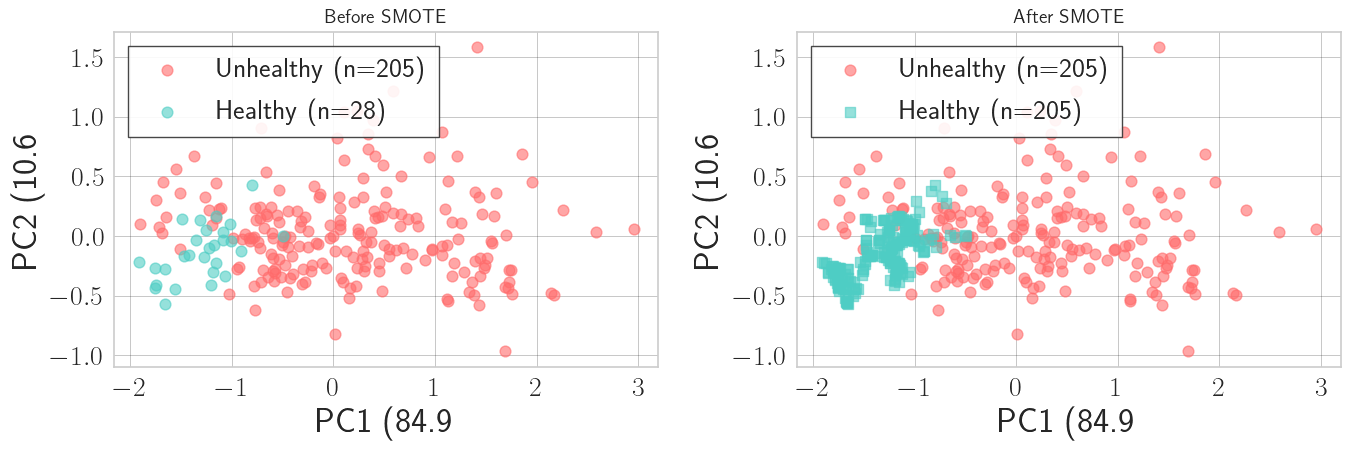

In [9]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 3

In [10]:
# Make a new column 'Health_Status'
df = df3.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.077096,0.076401,0.077640,0.073403,0.069708,0.067420,0.063497,0.063387,...,0.028871,0.028704,0.028565,0.028401,0.028233,0.028111,0.027981,0.027884,0.027915,0.027741
1,Control,1,0.074623,0.074337,0.075459,0.069064,0.065403,0.065427,0.062845,0.060349,...,0.030656,0.030465,0.030290,0.030118,0.030026,0.029918,0.029792,0.029630,0.029490,0.029318
2,Control,1,0.068844,0.064497,0.067699,0.062913,0.059612,0.059234,0.056685,0.054846,...,0.030536,0.030366,0.030277,0.030151,0.030064,0.029900,0.029709,0.029502,0.029186,0.029041
3,Control,1,0.066975,0.064955,0.066634,0.061690,0.059538,0.059540,0.053983,0.052394,...,0.025271,0.025113,0.024971,0.024842,0.024703,0.024573,0.024487,0.024374,0.024245,0.024119
4,Control,1,0.067311,0.064306,0.067247,0.061632,0.058040,0.056864,0.051009,0.050021,...,0.026281,0.026183,0.026014,0.025855,0.025573,0.025490,0.025571,0.025451,0.025312,0.025232


In [11]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    207
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    207
0    207
Name: count, dtype: int64

Original shape: (237, 2151), Balanced shape: (414, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.077096,0.076401,0.077640,0.073403,0.069708,0.067420,0.063497,0.063387,0.064254,...,0.028871,0.028704,0.028565,0.028401,0.028233,0.028111,0.027981,0.027884,0.027915,0.027741
1,1,0.074623,0.074337,0.075459,0.069064,0.065403,0.065427,0.062845,0.060349,0.060482,...,0.030656,0.030465,0.030290,0.030118,0.030026,0.029918,0.029792,0.029630,0.029490,0.029318
2,1,0.068844,0.064497,0.067699,0.062913,0.059612,0.059234,0.056685,0.054846,0.054258,...,0.030536,0.030366,0.030277,0.030151,0.030064,0.029900,0.029709,0.029502,0.029186,0.029041
3,1,0.066975,0.064955,0.066634,0.061690,0.059538,0.059540,0.053983,0.052394,0.052874,...,0.025271,0.025113,0.024971,0.024842,0.024703,0.024573,0.024487,0.024374,0.024245,0.024119
4,1,0.067311,0.064306,0.067247,0.061632,0.058040,0.056864,0.051009,0.050021,0.052026,...,0.026281,0.026183,0.026014,0.025855,0.025573,0.025490,0.025571,0.025451,0.025312,0.025232


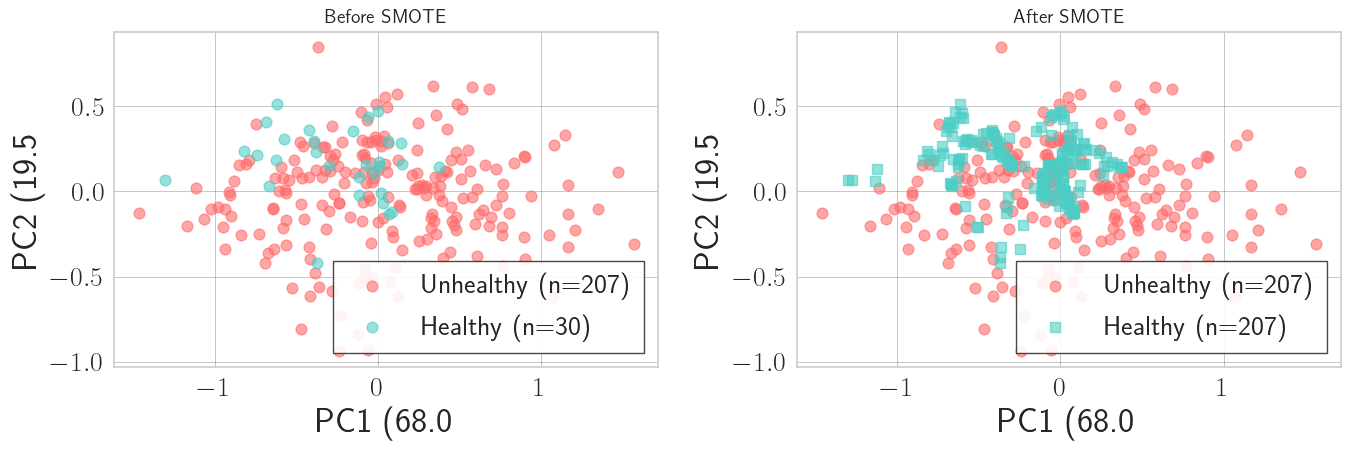

In [12]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 4

In [13]:
# Make a new column 'Health_Status'
df = df4.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.074723,0.074907,0.069226,0.073145,0.069501,0.060720,0.062748,0.060955,...,0.039735,0.039615,0.039570,0.039455,0.039427,0.039334,0.039157,0.038921,0.038661,0.038498
1,Control,1,0.064413,0.063294,0.060044,0.061458,0.059083,0.053877,0.053428,0.052120,...,0.037456,0.037284,0.037252,0.037116,0.036860,0.036708,0.036610,0.036515,0.036418,0.036374
2,Control,1,0.065758,0.065233,0.060532,0.060233,0.059288,0.056705,0.054850,0.051916,...,0.038584,0.038430,0.038355,0.038257,0.038215,0.038105,0.038004,0.037822,0.037529,0.037371
3,Control,1,0.062238,0.062061,0.057599,0.059343,0.057833,0.052907,0.051349,0.048695,...,0.036916,0.036795,0.036624,0.036527,0.036393,0.036301,0.036340,0.036221,0.035973,0.035830
4,Control,1,0.084853,0.082573,0.083905,0.081276,0.074833,0.069509,0.072085,0.071686,...,0.040126,0.039897,0.039598,0.039449,0.039432,0.039265,0.039116,0.038979,0.038711,0.038569


In [14]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    202
1     29
Name: count, dtype: int64

Balanced class distribution:
Sana
1    202
0    202
Name: count, dtype: int64

Original shape: (231, 2151), Balanced shape: (404, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.074723,0.074907,0.069226,0.073145,0.069501,0.060720,0.062748,0.060955,0.059762,...,0.039735,0.039615,0.039570,0.039455,0.039427,0.039334,0.039157,0.038921,0.038661,0.038498
1,1,0.064413,0.063294,0.060044,0.061458,0.059083,0.053877,0.053428,0.052120,0.050863,...,0.037456,0.037284,0.037252,0.037116,0.036860,0.036708,0.036610,0.036515,0.036418,0.036374
2,1,0.065758,0.065233,0.060532,0.060233,0.059288,0.056705,0.054850,0.051916,0.051912,...,0.038584,0.038430,0.038355,0.038257,0.038215,0.038105,0.038004,0.037822,0.037529,0.037371
3,1,0.062238,0.062061,0.057599,0.059343,0.057833,0.052907,0.051349,0.048695,0.047981,...,0.036916,0.036795,0.036624,0.036527,0.036393,0.036301,0.036340,0.036221,0.035973,0.035830
4,1,0.084853,0.082573,0.083905,0.081276,0.074833,0.069509,0.072085,0.071686,0.071082,...,0.040126,0.039897,0.039598,0.039449,0.039432,0.039265,0.039116,0.038979,0.038711,0.038569


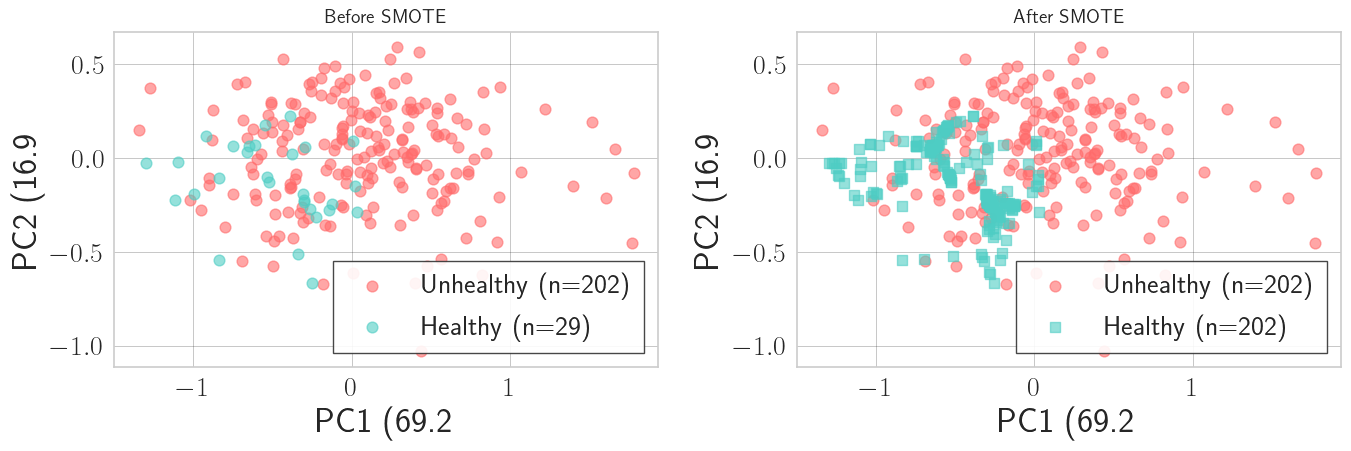

In [15]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 5

In [16]:
# Make a new column 'Health_Status'
df = df5.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.080177,0.078760,0.082160,0.076248,0.071906,0.070184,0.064798,0.063928,...,0.035288,0.035158,0.035075,0.034884,0.034635,0.034496,0.034324,0.034172,0.034152,0.034039
1,Control,1,0.074039,0.070126,0.072451,0.068987,0.063071,0.058199,0.056850,0.056829,...,0.031595,0.031430,0.031367,0.031190,0.030952,0.030767,0.030535,0.030396,0.030340,0.030264
2,Control,1,0.078362,0.076020,0.081738,0.076870,0.071523,0.068907,0.066183,0.065744,...,0.034020,0.033847,0.033764,0.033584,0.033396,0.033210,0.032949,0.032791,0.032706,0.032602
3,Control,1,0.068186,0.066410,0.070268,0.066827,0.063998,0.062501,0.057773,0.058305,...,0.028772,0.028623,0.028487,0.028352,0.028190,0.028103,0.028099,0.027965,0.027803,0.027681
4,Control,1,0.082644,0.077164,0.082672,0.077808,0.075697,0.076032,0.068969,0.068713,...,0.038365,0.038249,0.038118,0.038014,0.037958,0.037872,0.037791,0.037685,0.037531,0.037459


In [17]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    208
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    208
0    208
Name: count, dtype: int64

Original shape: (238, 2151), Balanced shape: (416, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.080177,0.078760,0.082160,0.076248,0.071906,0.070184,0.064798,0.063928,0.065339,...,0.035288,0.035158,0.035075,0.034884,0.034635,0.034496,0.034324,0.034172,0.034152,0.034039
1,1,0.074039,0.070126,0.072451,0.068987,0.063071,0.058199,0.056850,0.056829,0.058649,...,0.031595,0.031430,0.031367,0.031190,0.030952,0.030767,0.030535,0.030396,0.030340,0.030264
2,1,0.078362,0.076020,0.081738,0.076870,0.071523,0.068907,0.066183,0.065744,0.066988,...,0.034020,0.033847,0.033764,0.033584,0.033396,0.033210,0.032949,0.032791,0.032706,0.032602
3,1,0.068186,0.066410,0.070268,0.066827,0.063998,0.062501,0.057773,0.058305,0.059360,...,0.028772,0.028623,0.028487,0.028352,0.028190,0.028103,0.028099,0.027965,0.027803,0.027681
4,1,0.082644,0.077164,0.082672,0.077808,0.075697,0.076032,0.068969,0.068713,0.070741,...,0.038365,0.038249,0.038118,0.038014,0.037958,0.037872,0.037791,0.037685,0.037531,0.037459


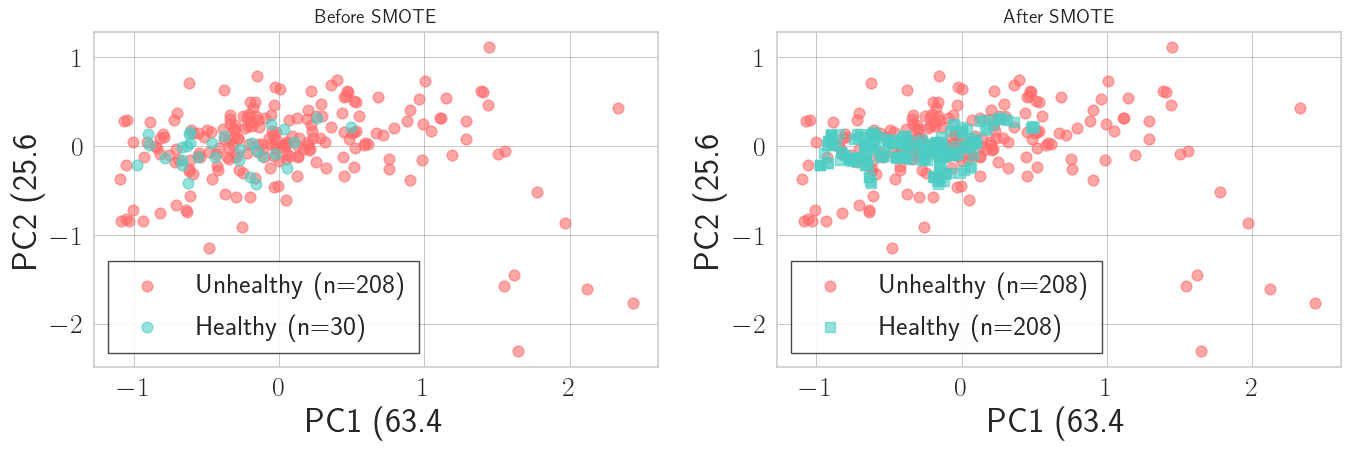

In [18]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 6

In [19]:
# Make a new column 'Health_Status'
df = df6.copy()

# Drop the 'Planta ' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.083593,0.079905,0.073394,0.075047,0.075460,0.071963,0.067658,0.063830,...,0.043526,0.043383,0.043299,0.043140,0.042942,0.042792,0.042597,0.042495,0.042533,0.042366
1,Control,1,0.071070,0.072514,0.071582,0.067428,0.067762,0.070967,0.068883,0.060744,...,0.039703,0.039451,0.039231,0.039009,0.038669,0.038516,0.038531,0.038407,0.038301,0.038193
2,Control,1,0.081492,0.082492,0.077754,0.078853,0.078830,0.076013,0.073081,0.067915,...,0.040540,0.040350,0.040093,0.039953,0.039855,0.039817,0.039920,0.039867,0.039833,0.039683
3,Control,1,0.077857,0.078985,0.075893,0.076726,0.074149,0.068599,0.066066,0.060931,...,0.038619,0.038488,0.038312,0.038166,0.038039,0.037927,0.037774,0.037709,0.037737,0.037672
4,Control,1,0.080690,0.082747,0.075338,0.075074,0.076218,0.076180,0.075103,0.065609,...,0.038107,0.037915,0.037727,0.037579,0.037529,0.037438,0.037346,0.037240,0.037149,0.037054


In [20]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    198
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    198
0    198
Name: count, dtype: int64

Original shape: (228, 2151), Balanced shape: (396, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.083593,0.079905,0.073394,0.075047,0.075460,0.071963,0.067658,0.063830,0.061430,...,0.043526,0.043383,0.043299,0.043140,0.042942,0.042792,0.042597,0.042495,0.042533,0.042366
1,1,0.071070,0.072514,0.071582,0.067428,0.067762,0.070967,0.068883,0.060744,0.054295,...,0.039703,0.039451,0.039231,0.039009,0.038669,0.038516,0.038531,0.038407,0.038301,0.038193
2,1,0.081492,0.082492,0.077754,0.078853,0.078830,0.076013,0.073081,0.067915,0.065124,...,0.040540,0.040350,0.040093,0.039953,0.039855,0.039817,0.039920,0.039867,0.039833,0.039683
3,1,0.077857,0.078985,0.075893,0.076726,0.074149,0.068599,0.066066,0.060931,0.058871,...,0.038619,0.038488,0.038312,0.038166,0.038039,0.037927,0.037774,0.037709,0.037737,0.037672
4,1,0.080690,0.082747,0.075338,0.075074,0.076218,0.076180,0.075103,0.065609,0.058789,...,0.038107,0.037915,0.037727,0.037579,0.037529,0.037438,0.037346,0.037240,0.037149,0.037054


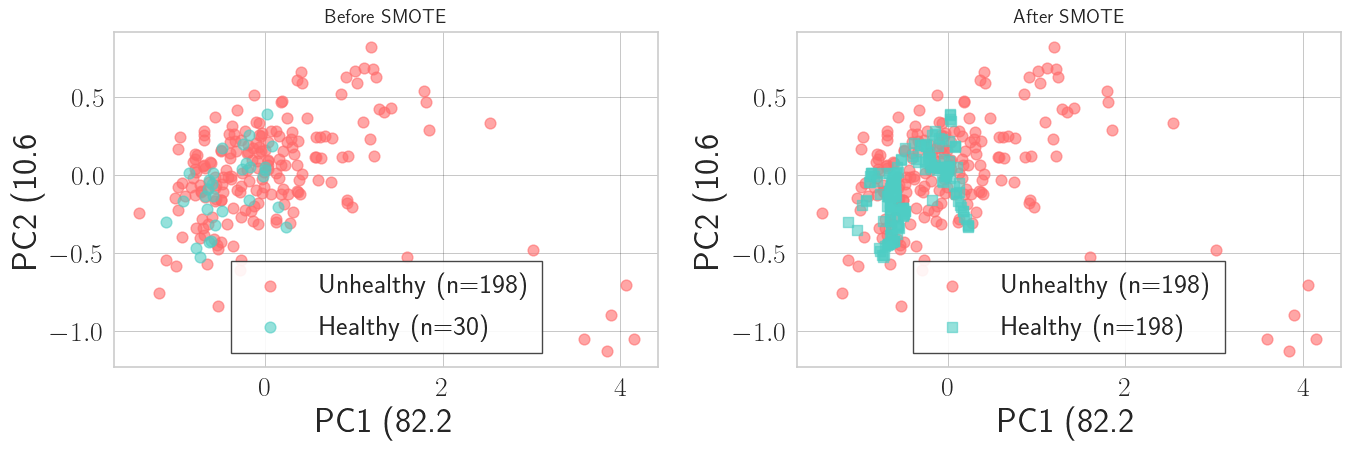

In [21]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 7

In [22]:
# Make a new column 'Health_Status'
df = df7.copy()

# Drop the 'Planta' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.080665,0.078947,0.076095,0.076057,0.076674,0.075621,0.071128,0.065085,...,0.043581,0.043390,0.043350,0.043182,0.043006,0.042823,0.042554,0.042378,0.042290,0.042115
1,Control,1,0.069144,0.069363,0.068419,0.070645,0.069557,0.065000,0.061534,0.059068,...,0.038174,0.037988,0.037872,0.037717,0.037651,0.037474,0.037195,0.036982,0.036745,0.036597
2,Control,1,0.076616,0.073350,0.070809,0.074157,0.075248,0.072309,0.068617,0.063023,...,0.034544,0.034326,0.034081,0.033883,0.033573,0.033437,0.033514,0.033369,0.033151,0.033020
3,Control,1,0.080048,0.078098,0.074735,0.076398,0.076766,0.073802,0.069329,0.066331,...,0.037457,0.037240,0.037009,0.036852,0.036858,0.036721,0.036493,0.036385,0.036281,0.036221
4,Control,1,0.081486,0.082473,0.079547,0.077651,0.078189,0.078181,0.072569,0.068084,...,0.035927,0.035760,0.035716,0.035555,0.035260,0.035055,0.034855,0.034737,0.034691,0.034592


In [23]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    186
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    186
0    186
Name: count, dtype: int64

Original shape: (216, 2151), Balanced shape: (372, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.080665,0.078947,0.076095,0.076057,0.076674,0.075621,0.071128,0.065085,0.062745,...,0.043581,0.043390,0.043350,0.043182,0.043006,0.042823,0.042554,0.042378,0.042290,0.042115
1,1,0.069144,0.069363,0.068419,0.070645,0.069557,0.065000,0.061534,0.059068,0.057498,...,0.038174,0.037988,0.037872,0.037717,0.037651,0.037474,0.037195,0.036982,0.036745,0.036597
2,1,0.076616,0.073350,0.070809,0.074157,0.075248,0.072309,0.068617,0.063023,0.060506,...,0.034544,0.034326,0.034081,0.033883,0.033573,0.033437,0.033514,0.033369,0.033151,0.033020
3,1,0.080048,0.078098,0.074735,0.076398,0.076766,0.073802,0.069329,0.066331,0.064852,...,0.037457,0.037240,0.037009,0.036852,0.036858,0.036721,0.036493,0.036385,0.036281,0.036221
4,1,0.081486,0.082473,0.079547,0.077651,0.078189,0.078181,0.072569,0.068084,0.066119,...,0.035927,0.035760,0.035716,0.035555,0.035260,0.035055,0.034855,0.034737,0.034691,0.034592


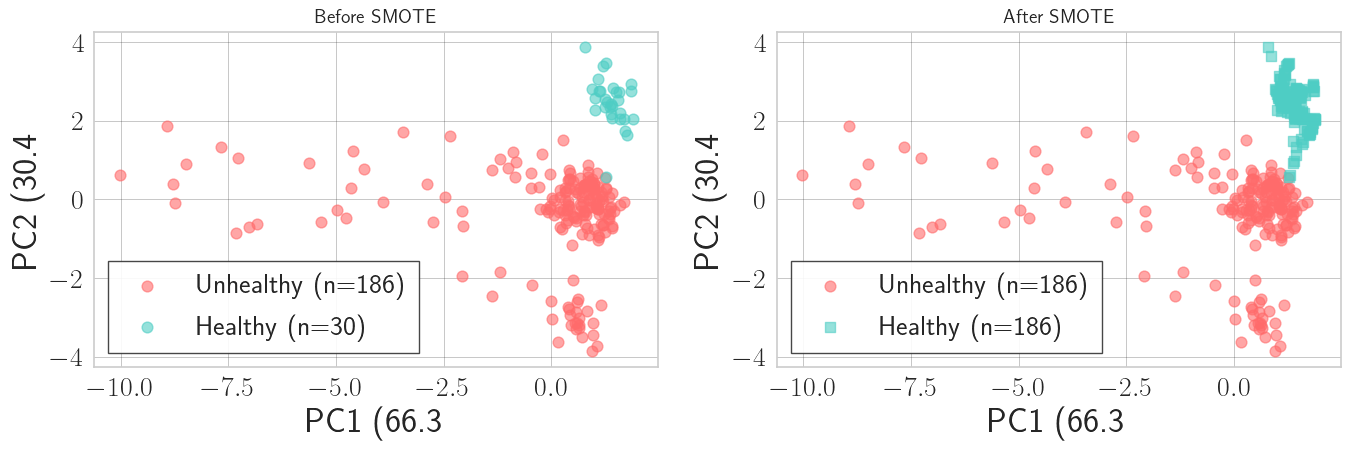

In [24]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 8

In [25]:
# Make a new column 'Health_Status'
df = df8.copy()

# Drop the 'Planta' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.072192,0.070766,0.068898,0.070177,0.070751,0.069163,0.066091,0.061895,...,0.037518,0.037349,0.037174,0.036982,0.036810,0.036678,0.036522,0.036390,0.036325,0.036259
1,Control,1,0.067591,0.066504,0.062394,0.064414,0.065218,0.062667,0.059184,0.056857,...,0.036295,0.036133,0.035927,0.035787,0.035769,0.035591,0.035315,0.035172,0.035006,0.034910
2,Control,1,0.070397,0.072826,0.068396,0.069870,0.069444,0.065892,0.063225,0.059620,...,0.042210,0.042031,0.041820,0.041696,0.041635,0.041554,0.041572,0.041463,0.041264,0.041100
3,Control,1,0.067402,0.068393,0.065392,0.064802,0.065278,0.064587,0.060688,0.057554,...,0.036598,0.036503,0.036599,0.036504,0.036363,0.036201,0.035880,0.035724,0.035633,0.035613
4,Control,1,0.072992,0.073462,0.074921,0.074614,0.072073,0.069147,0.068576,0.064738,...,0.040637,0.040476,0.040205,0.040060,0.040038,0.039909,0.039751,0.039616,0.039468,0.039318


In [26]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    179
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    179
0    179
Name: count, dtype: int64

Original shape: (209, 2151), Balanced shape: (358, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.072192,0.070766,0.068898,0.070177,0.070751,0.069163,0.066091,0.061895,0.060201,...,0.037518,0.037349,0.037174,0.036982,0.036810,0.036678,0.036522,0.036390,0.036325,0.036259
1,1,0.067591,0.066504,0.062394,0.064414,0.065218,0.062667,0.059184,0.056857,0.056048,...,0.036295,0.036133,0.035927,0.035787,0.035769,0.035591,0.035315,0.035172,0.035006,0.034910
2,1,0.070397,0.072826,0.068396,0.069870,0.069444,0.065892,0.063225,0.059620,0.057853,...,0.042210,0.042031,0.041820,0.041696,0.041635,0.041554,0.041572,0.041463,0.041264,0.041100
3,1,0.067402,0.068393,0.065392,0.064802,0.065278,0.064587,0.060688,0.057554,0.055798,...,0.036598,0.036503,0.036599,0.036504,0.036363,0.036201,0.035880,0.035724,0.035633,0.035613
4,1,0.072992,0.073462,0.074921,0.074614,0.072073,0.069147,0.068576,0.064738,0.061751,...,0.040637,0.040476,0.040205,0.040060,0.040038,0.039909,0.039751,0.039616,0.039468,0.039318


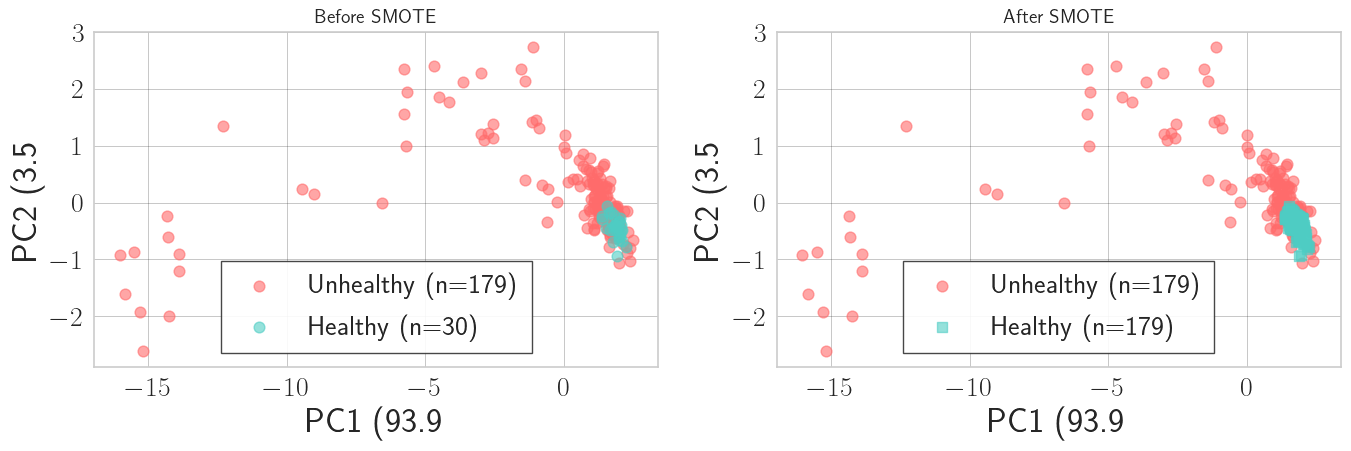

In [27]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 9

In [28]:
# Make a new column 'Health_Status'
df = df9.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.073860,0.068772,0.067796,0.064459,0.060561,0.057322,0.055146,0.055475,...,0.030395,0.030239,0.030084,0.029945,0.029790,0.029685,0.029627,0.029546,0.029485,0.029367
1,Control,1,0.067161,0.064477,0.067938,0.065555,0.061793,0.058393,0.054725,0.056045,...,0.027779,0.027616,0.027458,0.027311,0.027165,0.027011,0.026870,0.026728,0.026520,0.026456
2,Control,1,0.076845,0.070458,0.078300,0.071358,0.067587,0.068258,0.062155,0.061638,...,0.033267,0.033129,0.033070,0.032962,0.032877,0.032776,0.032654,0.032520,0.032374,0.032248
3,Control,1,0.077293,0.072656,0.077890,0.076225,0.073634,0.071182,0.066027,0.063489,...,0.030697,0.030513,0.030408,0.030250,0.030056,0.029924,0.029817,0.029728,0.029680,0.029601
4,Control,1,0.065264,0.060340,0.068591,0.063547,0.057661,0.055378,0.053817,0.055675,...,0.038683,0.038526,0.038195,0.038030,0.038013,0.037889,0.037744,0.037643,0.037504,0.037449


In [29]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    209
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    209
0    209
Name: count, dtype: int64

Original shape: (239, 2151), Balanced shape: (418, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.073860,0.068772,0.067796,0.064459,0.060561,0.057322,0.055146,0.055475,0.057136,...,0.030395,0.030239,0.030084,0.029945,0.029790,0.029685,0.029627,0.029546,0.029485,0.029367
1,1,0.067161,0.064477,0.067938,0.065555,0.061793,0.058393,0.054725,0.056045,0.057395,...,0.027779,0.027616,0.027458,0.027311,0.027165,0.027011,0.026870,0.026728,0.026520,0.026456
2,1,0.076845,0.070458,0.078300,0.071358,0.067587,0.068258,0.062155,0.061638,0.064043,...,0.033267,0.033129,0.033070,0.032962,0.032877,0.032776,0.032654,0.032520,0.032374,0.032248
3,1,0.077293,0.072656,0.077890,0.076225,0.073634,0.071182,0.066027,0.063489,0.063832,...,0.030697,0.030513,0.030408,0.030250,0.030056,0.029924,0.029817,0.029728,0.029680,0.029601
4,1,0.065264,0.060340,0.068591,0.063547,0.057661,0.055378,0.053817,0.055675,0.057516,...,0.038683,0.038526,0.038195,0.038030,0.038013,0.037889,0.037744,0.037643,0.037504,0.037449


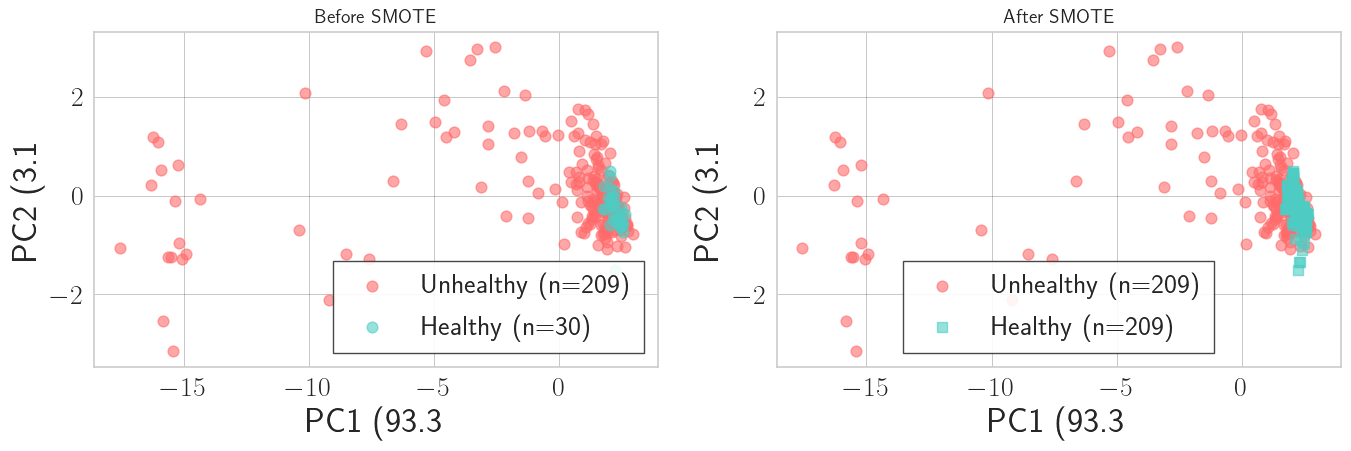

In [30]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 10

In [31]:
# Make a new column 'Health_Status'
df = df10.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.083555,0.079621,0.083467,0.078862,0.075102,0.073984,0.071158,0.070371,...,0.030554,0.030362,0.030148,0.030035,0.030034,0.029922,0.029810,0.029738,0.029607,0.029532
1,Control,1,0.075327,0.073848,0.078093,0.074296,0.069430,0.065301,0.059608,0.060230,...,0.029432,0.029188,0.028973,0.028771,0.028643,0.028495,0.028315,0.028228,0.028225,0.028161
2,Control,1,0.090605,0.084478,0.091553,0.086181,0.082013,0.080516,0.073748,0.071062,...,0.031466,0.031252,0.031011,0.030852,0.030806,0.030714,0.030645,0.030567,0.030474,0.030385
3,Control,1,0.077915,0.074246,0.079706,0.077052,0.071366,0.066747,0.065076,0.062712,...,0.028835,0.028716,0.028512,0.028398,0.028290,0.028146,0.028065,0.027911,0.027653,0.027496
4,Control,1,0.079603,0.075830,0.079945,0.074140,0.072004,0.073187,0.067204,0.063971,...,0.031128,0.030971,0.030772,0.030635,0.030560,0.030449,0.030333,0.030241,0.030149,0.030100


In [32]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    210
1     15
Name: count, dtype: int64

Balanced class distribution:
Sana
1    210
0    210
Name: count, dtype: int64

Original shape: (225, 2151), Balanced shape: (420, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.083555,0.079621,0.083467,0.078862,0.075102,0.073984,0.071158,0.070371,0.071017,...,0.030554,0.030362,0.030148,0.030035,0.030034,0.029922,0.029810,0.029738,0.029607,0.029532
1,1,0.075327,0.073848,0.078093,0.074296,0.069430,0.065301,0.059608,0.060230,0.062227,...,0.029432,0.029188,0.028973,0.028771,0.028643,0.028495,0.028315,0.028228,0.028225,0.028161
2,1,0.090605,0.084478,0.091553,0.086181,0.082013,0.080516,0.073748,0.071062,0.073898,...,0.031466,0.031252,0.031011,0.030852,0.030806,0.030714,0.030645,0.030567,0.030474,0.030385
3,1,0.077915,0.074246,0.079706,0.077052,0.071366,0.066747,0.065076,0.062712,0.063985,...,0.028835,0.028716,0.028512,0.028398,0.028290,0.028146,0.028065,0.027911,0.027653,0.027496
4,1,0.079603,0.075830,0.079945,0.074140,0.072004,0.073187,0.067204,0.063971,0.065071,...,0.031128,0.030971,0.030772,0.030635,0.030560,0.030449,0.030333,0.030241,0.030149,0.030100


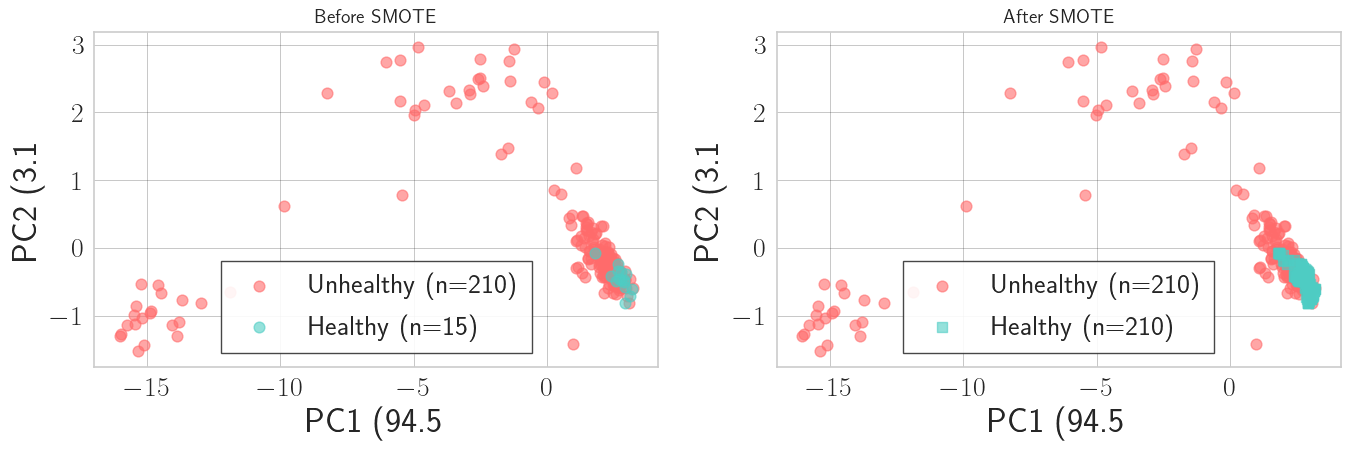

In [33]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 11

In [34]:
# Make a new column 'Health_Status'
df = df11.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.082520,0.074894,0.077570,0.076694,0.072901,0.068020,0.064189,0.064137,...,0.034513,0.034363,0.034162,0.034015,0.033811,0.033612,0.033442,0.033342,0.033236,0.033117
1,Control,1,0.071731,0.070800,0.076329,0.070059,0.063814,0.061029,0.057822,0.057361,...,0.029874,0.029710,0.029649,0.029524,0.029425,0.029300,0.029136,0.029018,0.028916,0.028764
2,Control,1,0.086958,0.080480,0.082647,0.079270,0.075974,0.073213,0.067540,0.066175,...,0.028626,0.028447,0.028212,0.028092,0.028180,0.028108,0.027990,0.027850,0.027648,0.027494
3,Control,1,0.072620,0.069721,0.070937,0.063733,0.059112,0.058377,0.055178,0.054282,...,0.029156,0.028958,0.028799,0.028597,0.028367,0.028199,0.028028,0.027856,0.027732,0.027601
4,Control,1,0.083111,0.080424,0.082277,0.076092,0.072546,0.071938,0.066860,0.064918,...,0.032048,0.031983,0.031915,0.031803,0.031724,0.031577,0.031302,0.031148,0.031018,0.030951


In [35]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    200
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    200
0    200
Name: count, dtype: int64

Original shape: (230, 2151), Balanced shape: (400, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.082520,0.074894,0.077570,0.076694,0.072901,0.068020,0.064189,0.064137,0.065247,...,0.034513,0.034363,0.034162,0.034015,0.033811,0.033612,0.033442,0.033342,0.033236,0.033117
1,1,0.071731,0.070800,0.076329,0.070059,0.063814,0.061029,0.057822,0.057361,0.058603,...,0.029874,0.029710,0.029649,0.029524,0.029425,0.029300,0.029136,0.029018,0.028916,0.028764
2,1,0.086958,0.080480,0.082647,0.079270,0.075974,0.073213,0.067540,0.066175,0.066932,...,0.028626,0.028447,0.028212,0.028092,0.028180,0.028108,0.027990,0.027850,0.027648,0.027494
3,1,0.072620,0.069721,0.070937,0.063733,0.059112,0.058377,0.055178,0.054282,0.053649,...,0.029156,0.028958,0.028799,0.028597,0.028367,0.028199,0.028028,0.027856,0.027732,0.027601
4,1,0.083111,0.080424,0.082277,0.076092,0.072546,0.071938,0.066860,0.064918,0.066453,...,0.032048,0.031983,0.031915,0.031803,0.031724,0.031577,0.031302,0.031148,0.031018,0.030951


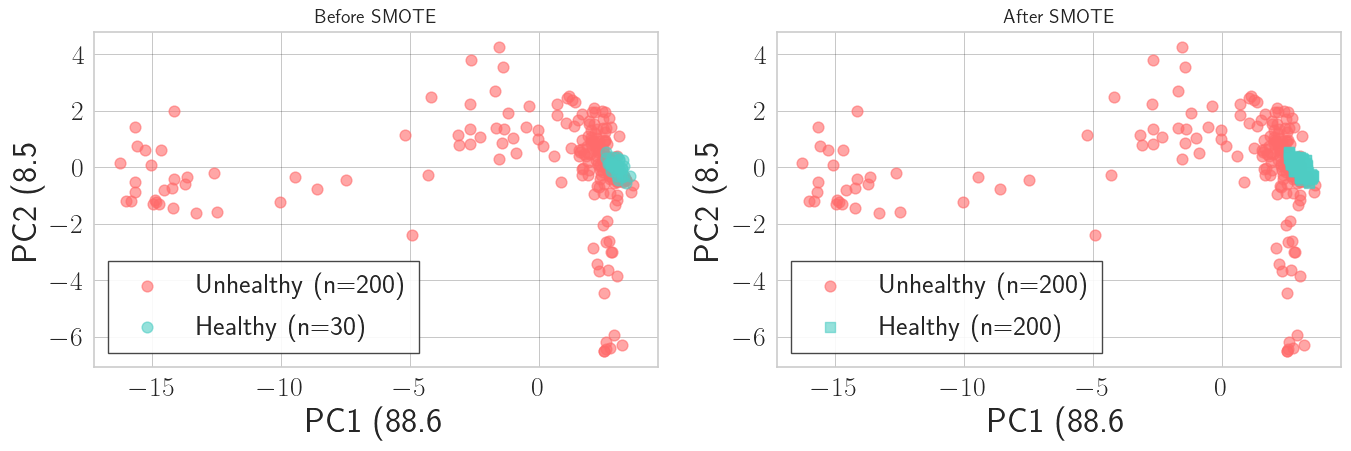

In [36]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 12

In [37]:
# Make a new column 'Health_Status'
df = df12.copy()

# Drop the 'Planta' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.068232,0.072210,0.066953,0.071272,0.069221,0.061493,0.060840,0.058393,...,0.038243,0.038003,0.037529,0.037242,0.036899,0.036715,0.036668,0.036646,0.036726,0.036748
1,Control,1,0.069469,0.068557,0.067614,0.072405,0.067971,0.057739,0.057577,0.056457,...,0.034358,0.034108,0.033718,0.033456,0.033050,0.032910,0.033039,0.033020,0.033061,0.032994
2,Control,1,0.068977,0.068584,0.061503,0.067413,0.064611,0.055044,0.057237,0.055094,...,0.034990,0.034736,0.034400,0.034171,0.033795,0.033650,0.033773,0.033704,0.033577,0.033530
3,Control,1,0.068365,0.068669,0.067072,0.064658,0.062009,0.061129,0.064017,0.058342,...,0.032503,0.032323,0.032073,0.031877,0.031593,0.031465,0.031439,0.031375,0.031405,0.031339
4,Control,1,0.072596,0.074704,0.075351,0.071436,0.066297,0.062701,0.062234,0.058701,...,0.036653,0.036470,0.036223,0.036069,0.035908,0.035826,0.035823,0.035858,0.035985,0.035996


In [38]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    187
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    187
0    187
Name: count, dtype: int64

Original shape: (217, 2151), Balanced shape: (374, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.068232,0.072210,0.066953,0.071272,0.069221,0.061493,0.060840,0.058393,0.054574,...,0.038243,0.038003,0.037529,0.037242,0.036899,0.036715,0.036668,0.036646,0.036726,0.036748
1,1,0.069469,0.068557,0.067614,0.072405,0.067971,0.057739,0.057577,0.056457,0.055687,...,0.034358,0.034108,0.033718,0.033456,0.033050,0.032910,0.033039,0.033020,0.033061,0.032994
2,1,0.068977,0.068584,0.061503,0.067413,0.064611,0.055044,0.057237,0.055094,0.053115,...,0.034990,0.034736,0.034400,0.034171,0.033795,0.033650,0.033773,0.033704,0.033577,0.033530
3,1,0.068365,0.068669,0.067072,0.064658,0.062009,0.061129,0.064017,0.058342,0.052955,...,0.032503,0.032323,0.032073,0.031877,0.031593,0.031465,0.031439,0.031375,0.031405,0.031339
4,1,0.072596,0.074704,0.075351,0.071436,0.066297,0.062701,0.062234,0.058701,0.057463,...,0.036653,0.036470,0.036223,0.036069,0.035908,0.035826,0.035823,0.035858,0.035985,0.035996


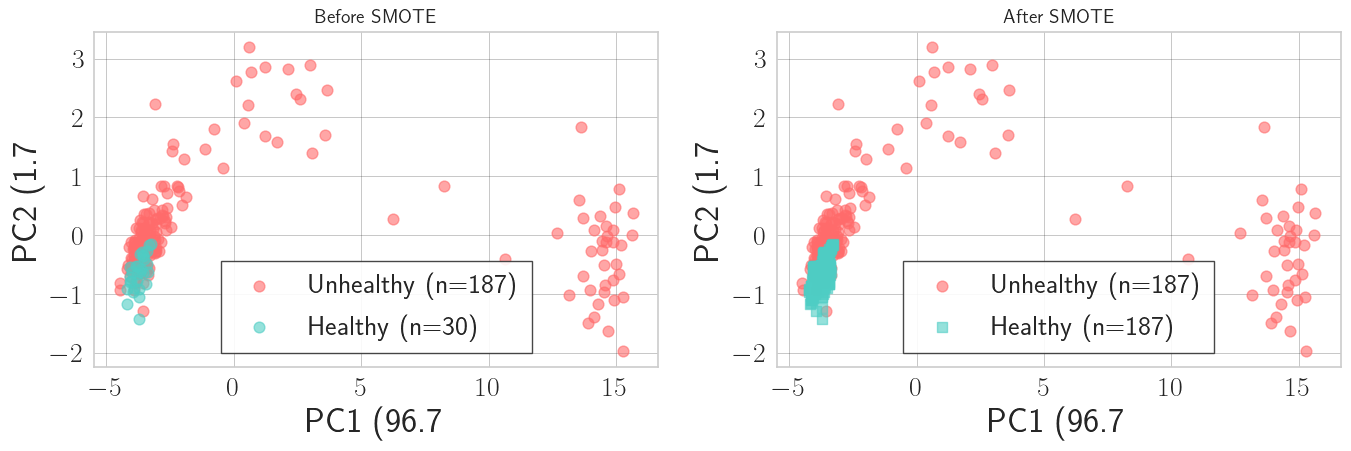

In [39]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 13

In [40]:
# Make a new column 'Health_Status'
df = df13.copy()

# Drop the 'Planta' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.071775,0.069190,0.069348,0.068999,0.067885,0.065449,0.061154,0.058129,...,0.034755,0.034553,0.034263,0.034055,0.033855,0.033714,0.033636,0.033576,0.033577,0.033461
1,Control,1,0.075353,0.074423,0.079386,0.071253,0.065744,0.065102,0.061031,0.060661,...,0.036825,0.036618,0.036405,0.036211,0.036003,0.035880,0.035841,0.035705,0.035572,0.035464
2,Control,1,0.083462,0.077633,0.079281,0.075569,0.071800,0.069781,0.068002,0.066085,...,0.033597,0.033424,0.033123,0.033009,0.032985,0.032846,0.032780,0.032647,0.032371,0.032174
3,Control,1,0.077487,0.073297,0.078130,0.075677,0.071632,0.068066,0.063898,0.064285,...,0.037609,0.037356,0.037168,0.036953,0.036759,0.036600,0.036416,0.036327,0.036376,0.036278
4,Control,1,0.069739,0.068477,0.076243,0.071491,0.066093,0.064169,0.062649,0.060493,...,0.031388,0.031220,0.031033,0.030897,0.030829,0.030720,0.030596,0.030543,0.030524,0.030453


In [41]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    181
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    181
0    181
Name: count, dtype: int64

Original shape: (211, 2151), Balanced shape: (362, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.071775,0.069190,0.069348,0.068999,0.067885,0.065449,0.061154,0.058129,0.058077,...,0.034755,0.034553,0.034263,0.034055,0.033855,0.033714,0.033636,0.033576,0.033577,0.033461
1,1,0.075353,0.074423,0.079386,0.071253,0.065744,0.065102,0.061031,0.060661,0.061293,...,0.036825,0.036618,0.036405,0.036211,0.036003,0.035880,0.035841,0.035705,0.035572,0.035464
2,1,0.083462,0.077633,0.079281,0.075569,0.071800,0.069781,0.068002,0.066085,0.066366,...,0.033597,0.033424,0.033123,0.033009,0.032985,0.032846,0.032780,0.032647,0.032371,0.032174
3,1,0.077487,0.073297,0.078130,0.075677,0.071632,0.068066,0.063898,0.064285,0.066431,...,0.037609,0.037356,0.037168,0.036953,0.036759,0.036600,0.036416,0.036327,0.036376,0.036278
4,1,0.069739,0.068477,0.076243,0.071491,0.066093,0.064169,0.062649,0.060493,0.059644,...,0.031388,0.031220,0.031033,0.030897,0.030829,0.030720,0.030596,0.030543,0.030524,0.030453


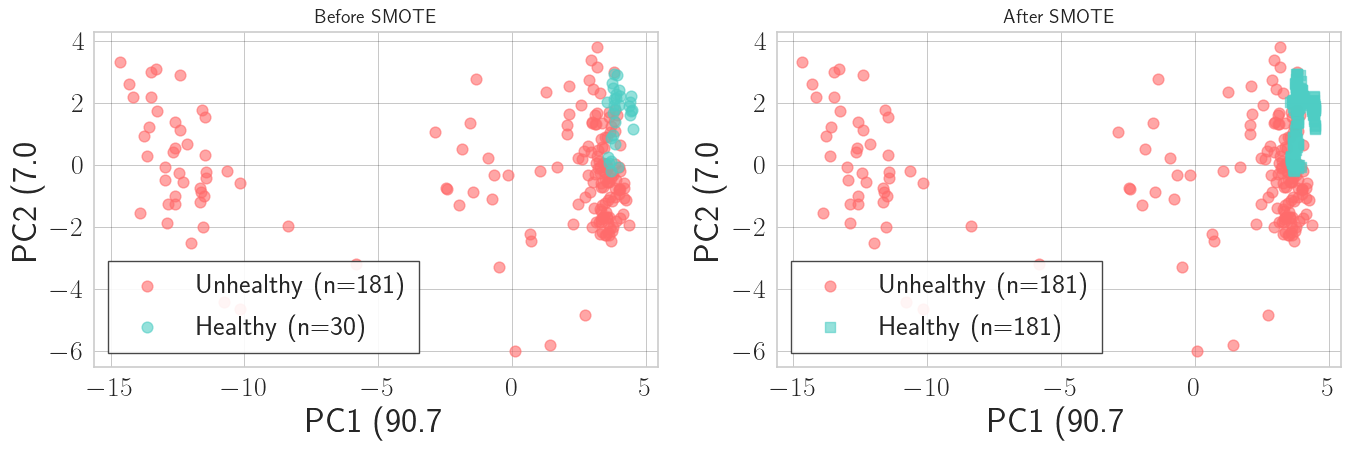

In [42]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 14

In [43]:
# Make a new column 'Health_Status'
df = df14.copy()

# Drop the 'Planta' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.065308,0.064932,0.065082,0.065324,0.061202,0.056406,0.059178,0.056174,...,0.044513,0.044338,0.044335,0.044220,0.044219,0.044042,0.043637,0.043524,0.043501,0.043393
1,Control,1,0.061800,0.061309,0.062190,0.060784,0.058494,0.057061,0.057716,0.054134,...,0.042430,0.042295,0.042321,0.042145,0.041933,0.041742,0.041411,0.041245,0.041236,0.041092
2,Control,1,0.066782,0.066421,0.062466,0.063100,0.061403,0.057503,0.056672,0.054282,...,0.042230,0.042096,0.042003,0.041851,0.041644,0.041607,0.041673,0.041561,0.041532,0.041323
3,Control,1,0.068391,0.066193,0.063277,0.061981,0.058933,0.055789,0.057152,0.053365,...,0.041479,0.041303,0.041068,0.040971,0.040997,0.040868,0.040794,0.040612,0.040204,0.040030
4,Control,1,0.065914,0.065724,0.062651,0.063099,0.061048,0.057605,0.058678,0.057453,...,0.039599,0.039499,0.039383,0.039303,0.039339,0.039309,0.039243,0.039155,0.039058,0.038970


In [44]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    179
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    179
0    179
Name: count, dtype: int64

Original shape: (209, 2151), Balanced shape: (358, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.065308,0.064932,0.065082,0.065324,0.061202,0.056406,0.059178,0.056174,0.054178,...,0.044513,0.044338,0.044335,0.044220,0.044219,0.044042,0.043637,0.043524,0.043501,0.043393
1,1,0.061800,0.061309,0.062190,0.060784,0.058494,0.057061,0.057716,0.054134,0.050751,...,0.042430,0.042295,0.042321,0.042145,0.041933,0.041742,0.041411,0.041245,0.041236,0.041092
2,1,0.066782,0.066421,0.062466,0.063100,0.061403,0.057503,0.056672,0.054282,0.051462,...,0.042230,0.042096,0.042003,0.041851,0.041644,0.041607,0.041673,0.041561,0.041532,0.041323
3,1,0.068391,0.066193,0.063277,0.061981,0.058933,0.055789,0.057152,0.053365,0.051853,...,0.041479,0.041303,0.041068,0.040971,0.040997,0.040868,0.040794,0.040612,0.040204,0.040030
4,1,0.065914,0.065724,0.062651,0.063099,0.061048,0.057605,0.058678,0.057453,0.054992,...,0.039599,0.039499,0.039383,0.039303,0.039339,0.039309,0.039243,0.039155,0.039058,0.038970


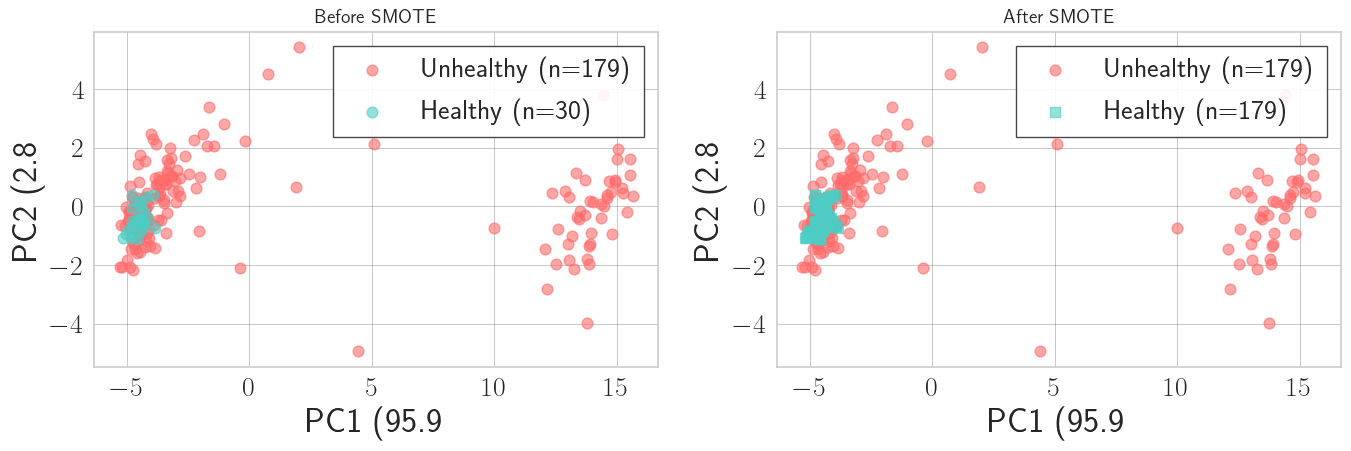

In [45]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 15

In [48]:
# Make a new column 'Health_Status'
df = df14.copy()

# Drop the 'Planta' column
df = df.drop(columns=['Planta'])

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.065308,0.064932,0.065082,0.065324,0.061202,0.056406,0.059178,0.056174,...,0.044513,0.044338,0.044335,0.044220,0.044219,0.044042,0.043637,0.043524,0.043501,0.043393
1,Control,1,0.061800,0.061309,0.062190,0.060784,0.058494,0.057061,0.057716,0.054134,...,0.042430,0.042295,0.042321,0.042145,0.041933,0.041742,0.041411,0.041245,0.041236,0.041092
2,Control,1,0.066782,0.066421,0.062466,0.063100,0.061403,0.057503,0.056672,0.054282,...,0.042230,0.042096,0.042003,0.041851,0.041644,0.041607,0.041673,0.041561,0.041532,0.041323
3,Control,1,0.068391,0.066193,0.063277,0.061981,0.058933,0.055789,0.057152,0.053365,...,0.041479,0.041303,0.041068,0.040971,0.040997,0.040868,0.040794,0.040612,0.040204,0.040030
4,Control,1,0.065914,0.065724,0.062651,0.063099,0.061048,0.057605,0.058678,0.057453,...,0.039599,0.039499,0.039383,0.039303,0.039339,0.039309,0.039243,0.039155,0.039058,0.038970


In [49]:
# Apply SMOTE to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

df_balanced.head()

Original class distribution:
Sana
0    179
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    179
0    179
Name: count, dtype: int64

Original shape: (209, 2151), Balanced shape: (358, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\2984401751.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


,Sana,350,351,352,353,354,355,356,357,358,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,0.065308,0.064932,0.065082,0.065324,0.061202,0.056406,0.059178,0.056174,0.054178,...,0.044513,0.044338,0.044335,0.044220,0.044219,0.044042,0.043637,0.043524,0.043501,0.043393
1,1,0.061800,0.061309,0.062190,0.060784,0.058494,0.057061,0.057716,0.054134,0.050751,...,0.042430,0.042295,0.042321,0.042145,0.041933,0.041742,0.041411,0.041245,0.041236,0.041092
2,1,0.066782,0.066421,0.062466,0.063100,0.061403,0.057503,0.056672,0.054282,0.051462,...,0.042230,0.042096,0.042003,0.041851,0.041644,0.041607,0.041673,0.041561,0.041532,0.041323
3,1,0.068391,0.066193,0.063277,0.061981,0.058933,0.055789,0.057152,0.053365,0.051853,...,0.041479,0.041303,0.041068,0.040971,0.040997,0.040868,0.040794,0.040612,0.040204,0.040030
4,1,0.065914,0.065724,0.062651,0.063099,0.061048,0.057605,0.058678,0.057453,0.054992,...,0.039599,0.039499,0.039383,0.039303,0.039339,0.039309,0.039243,0.039155,0.039058,0.038970


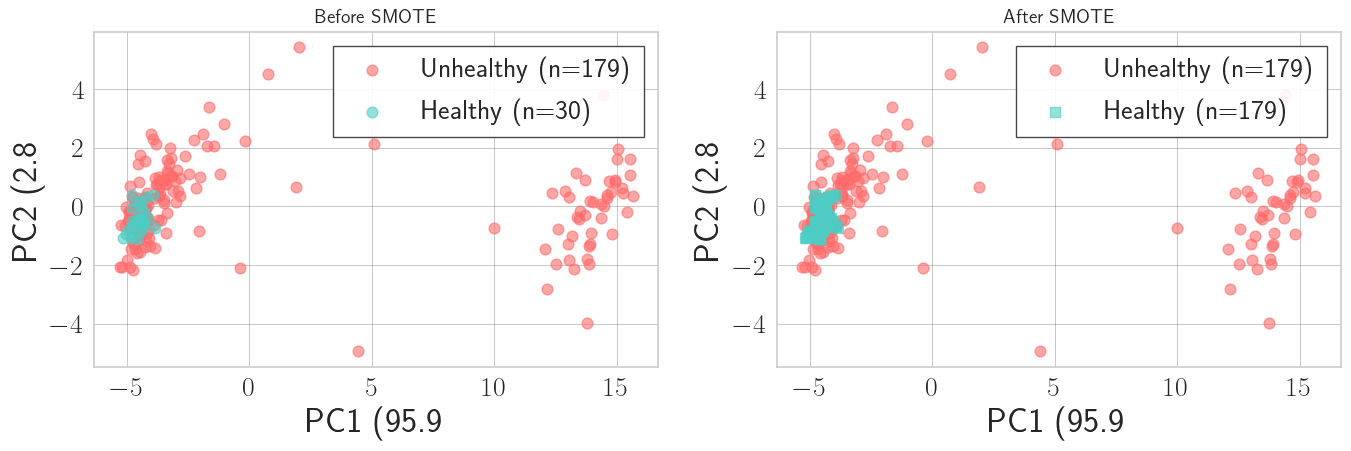

In [50]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## ADASYN

# Day 1

In [51]:
# Make a new column 'Health_Status'
df = df1.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()


,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.078084,0.075299,0.077410,0.074002,0.070505,0.067700,0.062893,0.062420,...,0.036214,0.036081,0.035957,0.035807,0.035688,0.035551,0.035364,0.035257,0.035179,0.035142
1,Control,1,0.073550,0.067523,0.071681,0.067482,0.063859,0.062469,0.059024,0.057638,...,0.033057,0.032865,0.032683,0.032480,0.032208,0.032009,0.031834,0.031691,0.031569,0.031492
2,Control,1,0.078702,0.072332,0.076551,0.075096,0.069730,0.063826,0.060950,0.061619,...,0.032032,0.031893,0.031702,0.031533,0.031349,0.031142,0.030905,0.030750,0.030586,0.030511
3,Control,1,0.068565,0.067309,0.070531,0.066035,0.062364,0.060529,0.055741,0.052761,...,0.031268,0.031147,0.030997,0.030795,0.030522,0.030354,0.030158,0.030026,0.030024,0.029915
4,Control,1,0.070898,0.067701,0.075494,0.069948,0.063975,0.061855,0.060048,0.059379,...,0.029287,0.029146,0.029101,0.028976,0.028791,0.028641,0.028453,0.028389,0.028404,0.028371


In [52]:
# Apply ADASYN to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = ADASYN(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

Original class distribution:
Sana
0    209
1     30
Name: count, dtype: int64

Balanced class distribution:
Sana
1    211
0    209
Name: count, dtype: int64

Original shape: (239, 2151), Balanced shape: (420, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\474668851.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


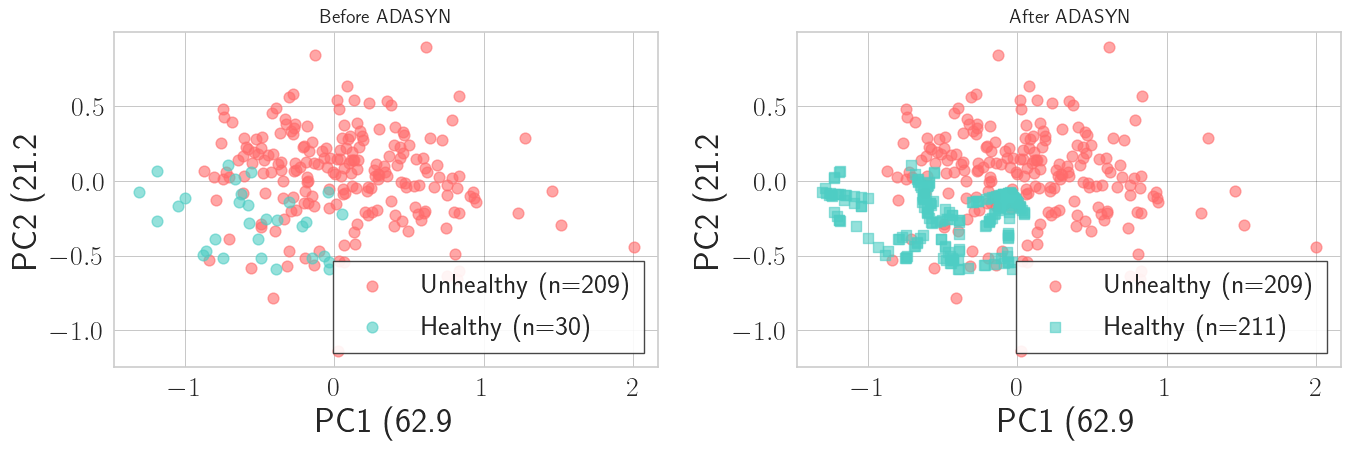

In [55]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before ADASYN', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After ADASYN', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Day 2

In [56]:
# Make a new column 'Health_Status'
df = df2.copy()

columns_idx = list(df.columns)[1:]

# Add 'Sana' column at the beginning (after 'Tratamiento' and 'Planta')
df.insert(1, 'Sana', df['Tratamiento'].apply(lambda x: 1 if x == 'Control' else 0))

df.head()

,Tratamiento,Sana,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Control,1,0.057346,0.056540,0.052751,0.053504,0.054180,0.052891,0.050285,0.046155,...,0.033542,0.033385,0.033349,0.033178,0.032902,0.032731,0.032548,0.032408,0.032326,0.032270
1,Control,1,0.063527,0.063055,0.062428,0.061098,0.060865,0.060550,0.057198,0.053444,...,0.035794,0.035634,0.035392,0.035225,0.035033,0.034945,0.034993,0.034875,0.034711,0.034583
2,Control,1,0.050986,0.050807,0.050726,0.049559,0.049560,0.048814,0.043256,0.041493,...,0.028711,0.028602,0.028589,0.028482,0.028458,0.028318,0.027975,0.027880,0.027913,0.027835
3,Control,1,0.061819,0.061138,0.058046,0.059413,0.058527,0.055289,0.054370,0.051970,...,0.033141,0.032946,0.032699,0.032572,0.032542,0.032512,0.032608,0.032508,0.032356,0.032179
4,Control,1,0.064970,0.064004,0.061963,0.064850,0.065684,0.062802,0.058909,0.054344,...,0.035396,0.035206,0.034999,0.034813,0.034685,0.034548,0.034402,0.034266,0.034165,0.034061


In [57]:
# Apply ADASYN to balance the dataset
X = df[columns_idx]
y = df['Sana']

smote = ADASYN(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create balanced dataframe
df_balanced = pd.DataFrame(X_balanced, columns=columns_idx)
df_balanced.insert(0, 'Sana', y_balanced)

print(f"Original class distribution:\n{y.value_counts()}")
print(f"\nBalanced class distribution:\n{y_balanced.value_counts()}")
print(f"\nOriginal shape: {X.shape}, Balanced shape: {X_balanced.shape}")

Original class distribution:
Sana
0    205
1     28
Name: count, dtype: int64

Balanced class distribution:
Sana
1    210
0    205
Name: count, dtype: int64

Original shape: (233, 2151), Balanced shape: (415, 2151)


C:\Users\ricar\AppData\Local\Temp\ipykernel_12424\474668851.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_balanced.insert(0, 'Sana', y_balanced)


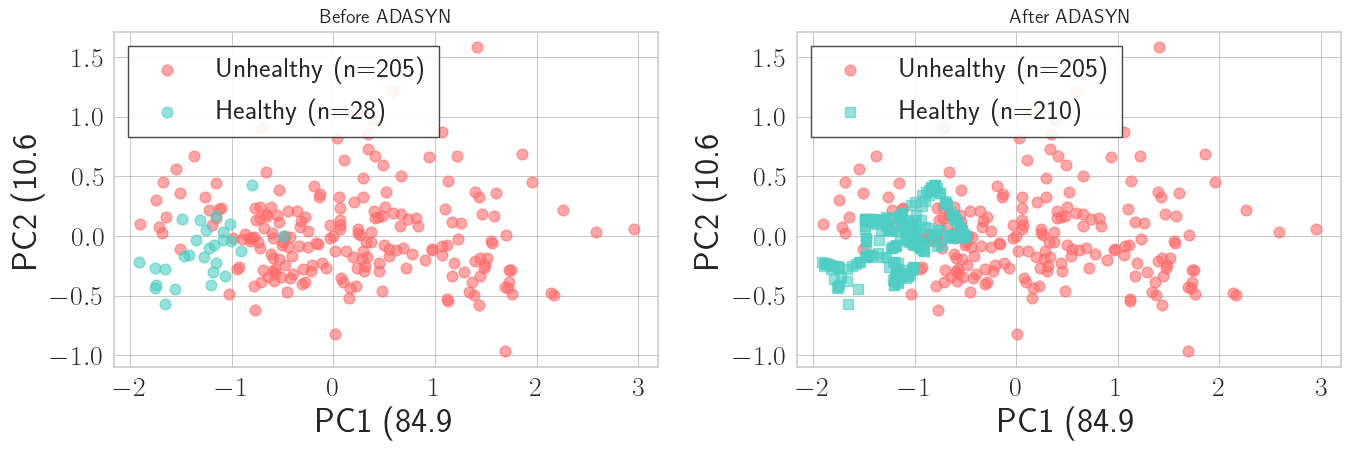

In [58]:
# Simple 2-plot comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PCA for both datasets
pca = PCA(n_components=2)
X_pca_original = pca.fit_transform(X)
X_pca_balanced = pca.transform(X_balanced)

# Plot original
axes[0].scatter(X_pca_original[y==0, 0], X_pca_original[y==0, 1], 
                c='#FF6B6B', label=f'Unhealthy (n={sum(y==0)})', alpha=0.6, s=60)
axes[0].scatter(X_pca_original[y==1, 0], X_pca_original[y==1, 1], 
                c='#4ECDC4', label=f'Healthy (n={sum(y==1)})', alpha=0.6, s=60)
axes[0].set_title('Before ADASYN', fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot balanced
axes[1].scatter(X_pca_balanced[y_balanced==0, 0], X_pca_balanced[y_balanced==0, 1],
                c='#FF6B6B', label=f'Unhealthy (n={sum(y_balanced==0)})', alpha=0.6, s=60)
axes[1].scatter(X_pca_balanced[y_balanced==1, 0], X_pca_balanced[y_balanced==1, 1],
                c='#4ECDC4', label=f'Healthy (n={sum(y_balanced==1)})', alpha=0.6, s=60, 
                marker='s')  # Square markers for synthetic samples
axes[1].set_title('After ADASYN', fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()